In [23]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import defaultdict

In [24]:
matplotlib.rcParams.update({'font.size': 12})

In [2]:
outpath = "output/plot_FDRs/"

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 1285


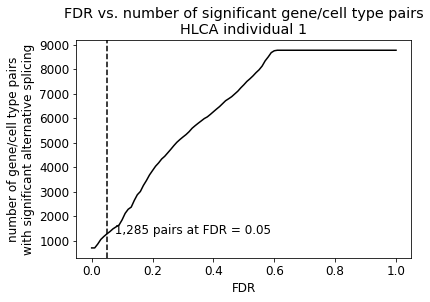

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 1285


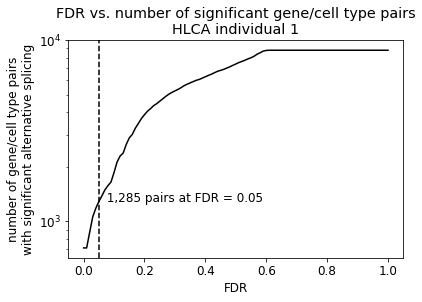

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 472


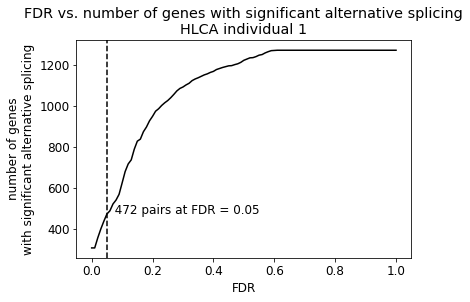

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 472


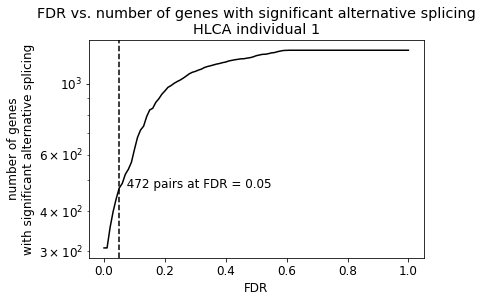

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 1373


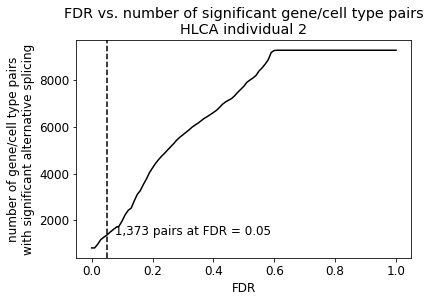

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 1373


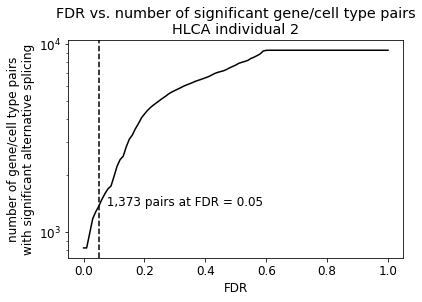

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 426


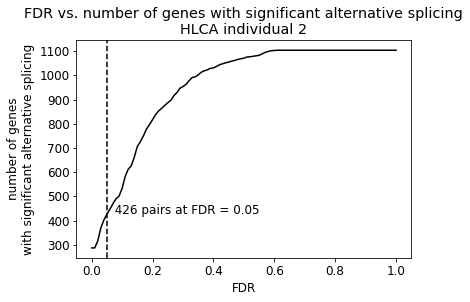

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 426


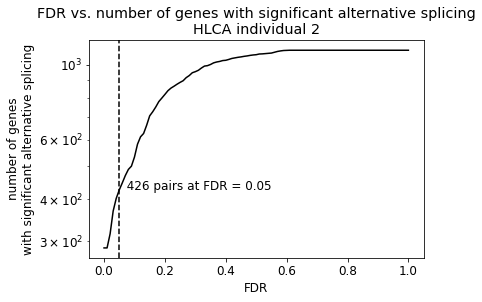

In [34]:
datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
for dataname in datanames:
  df = pd.read_csv("../scripts/output/final_FDRs_mz/{}_FDR_S_0.1_z_0.0_b_5.tsv".format(dataname),sep="\t")
  df = df[~df["geneR1A_uniq"].str.startswith("unknown")]
  # genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
  #         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"CALD1" : '#bcbd22',"PPP1R12A" : '#17becf',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}
  genes = {}
  #[u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
  marker_dict = defaultdict(lambda : "o")
  marker_dict["FTL"] = "X"
  marker_dict["MALAT1"] = "X"
  datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
  name_dict = {x : "HLCA individual {}".format(i) for x, i in zip(datanames,range(1,3))}

  colors = ['#17becf', u'#ff7f0e', "black",u'#2ca02c']
  colors = ["black"]
  for val in ["","_log"]:
    count = 0
    for FDR_col in [c for c in df.columns if c.startswith("FDR_")]:
      print("num",FDR_col,df[df[FDR_col] <= 0.05].shape[0])
      x_vals = [x*0.01 for x in range(101)]
      y_vals = []
      for x in x_vals:
        y_vals.append(df[df[FDR_col] <= x].shape[0])

      plt.plot(x_vals,y_vals,label=FDR_col,color=colors[count])
      plt.text(0.05,y_vals[5],"  {:,} pairs at FDR = 0.05".format(df[df[FDR_col] <= 0.05].shape[0]))
      count += 1
      for gene, color in genes.items():
        try:
          x_val = df[df["geneR1A_uniq"] == gene][FDR_col].min()
          y_val = df[df[FDR_col] <= x_val].shape[0]
          plt.plot([x_val],y_val,marker=marker_dict[gene],linestyle="",label=gene,color=color,markersize=8)
        except Exception as e:
          print(e)
  #   plt.legend(bbox_to_anchor=(1.05,1))
    plt.xlabel("FDR")
    plt.axvline(x=0.05,linestyle="--",color="k")

    if val == "_log":
      plt.yscale("log")
    plt.ylabel("number of gene/cell type pairs\nwith significant alternative splicing")
    plt.title("FDR vs. number of significant gene/cell type pairs\n{}".format(name_dict[dataname],df[df[FDR_col] <= 0.05].shape[0]))
    plt.savefig("{}{}_gene_ont_mz{}.png".format(outpath,dataname,val),bbox_inches="tight")
    plt.show()
  # genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
  #         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}
  # marker_dict = defaultdict(lambda : "o")
  # marker_dict["FTL"] = "X"
  # marker_dict["MALAT1"] = "X"
  # colors = ['#17becf', u'#ff7f0e', "black",u'#2ca02c']

  for val in ["","_log"]:

    count = 0
    for FDR_col in [c for c in df.columns if c.startswith("FDR_")]:
      print("num",FDR_col,df[df[FDR_col] < 0.05]["geneR1A_uniq"].nunique())

      x_vals = [x*0.01 for x in range(101)]
      y_vals = []
      for x in x_vals:
        y_vals.append(df[df[FDR_col] <= x]["geneR1A_uniq"].nunique())

      plt.plot(x_vals,y_vals,label=FDR_col,color=colors[count])
      plt.text(0.05,y_vals[5],"  {:,} pairs at FDR = 0.05".format(df[df[FDR_col] <= 0.05]["geneR1A_uniq"].nunique()))

      count += 1
      for gene, color in genes.items():
        try:
          x_val = df[df["geneR1A_uniq"] == gene][FDR_col].min()
          y_val = df[df[FDR_col] <= x_val]["geneR1A_uniq"].nunique()
          plt.plot([x_val],y_val,marker=marker_dict[gene],linestyle="",label=gene,color=color,markersize=8)
        except Exception as e:
          print(e)
  #   plt.legend(bbox_to_anchor=(1.05,1))
    plt.xlabel("FDR")
    plt.axvline(x=0.05,linestyle="--",color="k")

    if val == "_log":
      plt.yscale("log")
    plt.ylabel("number of genes\nwith significant alternative splicing")
    plt.title("FDR vs. number of genes with significant alternative splicing\n{}".format(name_dict[dataname]))
    plt.savefig("{}{}_gene_mz{}.png".format(outpath,dataname,val),bbox_inches="tight")

    plt.show()

In [12]:
# dataname = "TSP1_10x_nopanc_with_postprocessing"
# dataname = "TSP2_10x_3prime_with_postprocessing_shared"
dataname = "HLCA4_P3_10x_with_postprocessing_lung"
# dataname = "HLCA4_P3"
df = pd.read_csv("../scripts/output/final_FDRs_mz/{}_FDR_S_0.1_z_0.0_b_5.tsv".format(dataname),sep="\t")
df = df[~df["geneR1A_uniq"].str.startswith("unknown")]


In [5]:
# genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
#         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}

# gene_list = list(genes.keys()) + ["ATF3","PPP1R12A","CALD1"]

genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b',"CD47" : '#3182bd'}

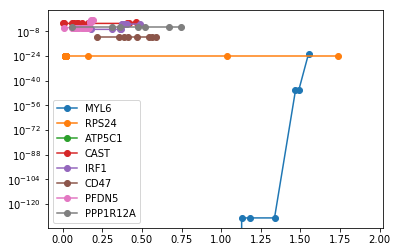

In [24]:
for gene in gene_list:
  gene_df = df[df["geneR1A_uniq"] == gene]
  x_vals = []
  y_vals = []
  gene_df = gene_df.sort_values("abs_mz")
  for val in gene_df["abs_mz"].unique():
    x_vals.append(val)
    y_vals.append(gene_df[gene_df["abs_mz"] >= val]["q"].min())
  plt.plot(x_vals,y_vals,marker="o",label=gene)
plt.legend()
plt.yscale("log")
plt.show()

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 1373


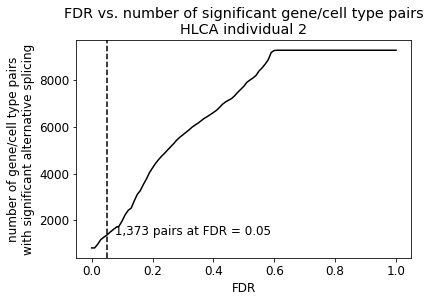

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 1373


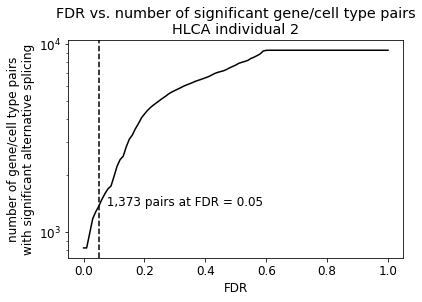

In [25]:
# genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
#         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"CALD1" : '#bcbd22',"PPP1R12A" : '#17becf',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}
genes = {}
#[u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']
marker_dict = defaultdict(lambda : "o")
marker_dict["FTL"] = "X"
marker_dict["MALAT1"] = "X"
datanames = ["HLCA4_P2_10x_with_postprocessing_lung","HLCA4_P3_10x_with_postprocessing_lung"]
name_dict = {x : "HLCA individual {}".format(i) for x, i in zip(datanames,range(1,3))}

colors = ['#17becf', u'#ff7f0e', "black",u'#2ca02c']
colors = ["black"]
for val in ["","_log"]:
  count = 0
  for FDR_col in [c for c in df.columns if c.startswith("FDR_")]:
    print("num",FDR_col,df[df[FDR_col] <= 0.05].shape[0])
    x_vals = [x*0.01 for x in range(101)]
    y_vals = []
    for x in x_vals:
      y_vals.append(df[df[FDR_col] <= x].shape[0])

    plt.plot(x_vals,y_vals,label=FDR_col,color=colors[count])
    plt.text(0.05,y_vals[5],"  {:,} pairs at FDR = 0.05".format(df[df[FDR_col] <= 0.05].shape[0]))
    count += 1
    for gene, color in genes.items():
      try:
        x_val = df[df["geneR1A_uniq"] == gene][FDR_col].min()
        y_val = df[df[FDR_col] <= x_val].shape[0]
        plt.plot([x_val],y_val,marker=marker_dict[gene],linestyle="",label=gene,color=color,markersize=8)
      except Exception as e:
        print(e)
#   plt.legend(bbox_to_anchor=(1.05,1))
  plt.xlabel("FDR")
  plt.axvline(x=0.05,linestyle="--",color="k")

  if val == "_log":
    plt.yscale("log")
  plt.ylabel("number of gene/cell type pairs\nwith significant alternative splicing")
  plt.title("FDR vs. number of significant gene/cell type pairs\n{}".format(name_dict[dataname],df[df[FDR_col] <= 0.05].shape[0]))
  plt.savefig("{}{}_gene_ont_mz{}.png".format(outpath,dataname,val),bbox_inches="tight")
  plt.show()

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 426


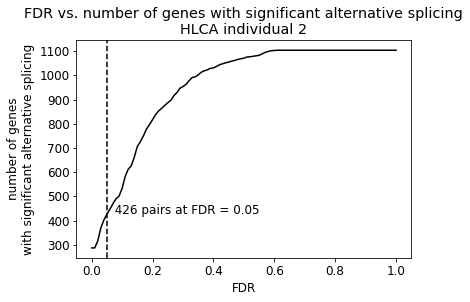

num FDR_HLCA4_P2_10x_with_postprocessing_lung_HLCA4_P3_10x_with_postprocessing_lung 426


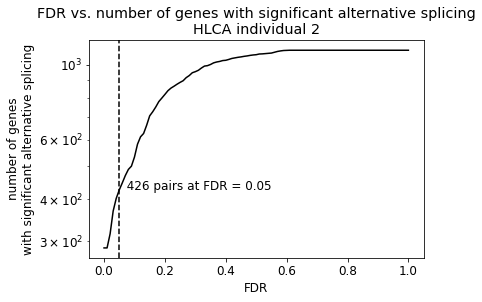

In [33]:
# genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
#         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}
# marker_dict = defaultdict(lambda : "o")
# marker_dict["FTL"] = "X"
# marker_dict["MALAT1"] = "X"
# colors = ['#17becf', u'#ff7f0e', "black",u'#2ca02c']

for val in ["","_log"]:
  
  count = 0
  for FDR_col in [c for c in df.columns if c.startswith("FDR_")]:
    print("num",FDR_col,df[df[FDR_col] < 0.05]["geneR1A_uniq"].nunique())

    x_vals = [x*0.01 for x in range(101)]
    y_vals = []
    for x in x_vals:
      y_vals.append(df[df[FDR_col] <= x]["geneR1A_uniq"].nunique())

    plt.plot(x_vals,y_vals,label=FDR_col,color=colors[count])
    plt.text(0.05,y_vals[5],"  {:,} pairs at FDR = 0.05".format(df[df[FDR_col] <= 0.05]["geneR1A_uniq"].nunique()))

    count += 1
    for gene, color in genes.items():
      try:
        x_val = df[df["geneR1A_uniq"] == gene][FDR_col].min()
        y_val = df[df[FDR_col] <= x_val]["geneR1A_uniq"].nunique()
        plt.plot([x_val],y_val,marker=marker_dict[gene],linestyle="",label=gene,color=color,markersize=8)
      except Exception as e:
        print(e)
#   plt.legend(bbox_to_anchor=(1.05,1))
  plt.xlabel("FDR")
  plt.axvline(x=0.05,linestyle="--",color="k")

  if val == "_log":
    plt.yscale("log")
  plt.ylabel("number of genes\nwith significant alternative splicing")
  plt.title("FDR vs. number of genes with significant alternative splicing\n{}".format(name_dict[dataname]))
  plt.savefig("{}{}_gene_mz{}.png".format(outpath,dataname,val),bbox_inches="tight")

  plt.show()

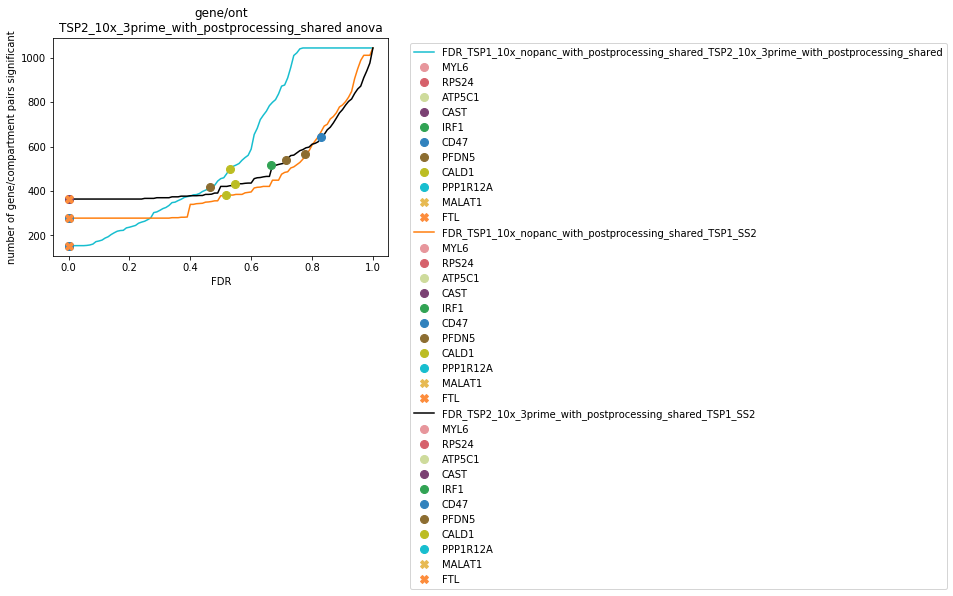

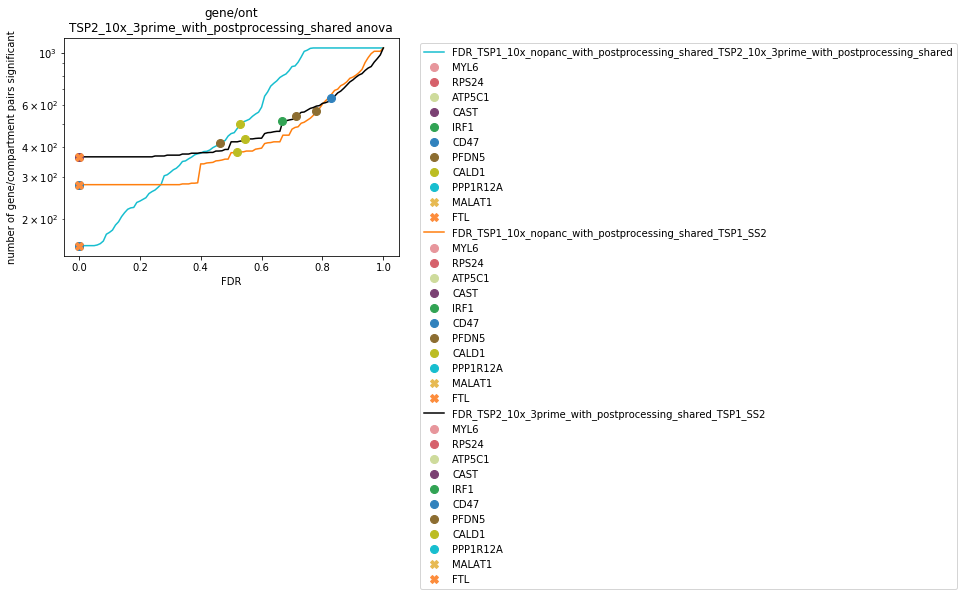

In [7]:
# genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
#         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}

for val in ["","_log"]:
  count = 0
  for FDR_col in [c for c in df2.columns if c.startswith("FDR_")]:
    x_vals = [x*0.01 for x in range(101)]
    y_vals = []
    for x in x_vals:
      y_vals.append(df2[df2[FDR_col] <= x].shape[0])

    plt.plot(x_vals,y_vals,label=FDR_col,color = colors[count])
    count += 1
    for gene, color in genes.items():
      x_val = df2[df2["gene"] == gene][FDR_col].min()
      y_val = df2[df2[FDR_col] <= x_val].shape[0]
      plt.plot([x_val],y_val,marker=marker_dict[gene],linestyle="",label=gene,color=color,markersize=8)
  plt.legend(bbox_to_anchor=(1.05,1))
  plt.xlabel("FDR")
  plt.ylabel("number of gene/compartment pairs significant")
  plt.title("gene/ont\n{} anova".format(dataname))
  if val == "_log":
    plt.yscale("log")
  plt.savefig("{}{}_gene_ont_anova{}.png".format(outpath,dataname,val),bbox_inches="tight")

  plt.show()

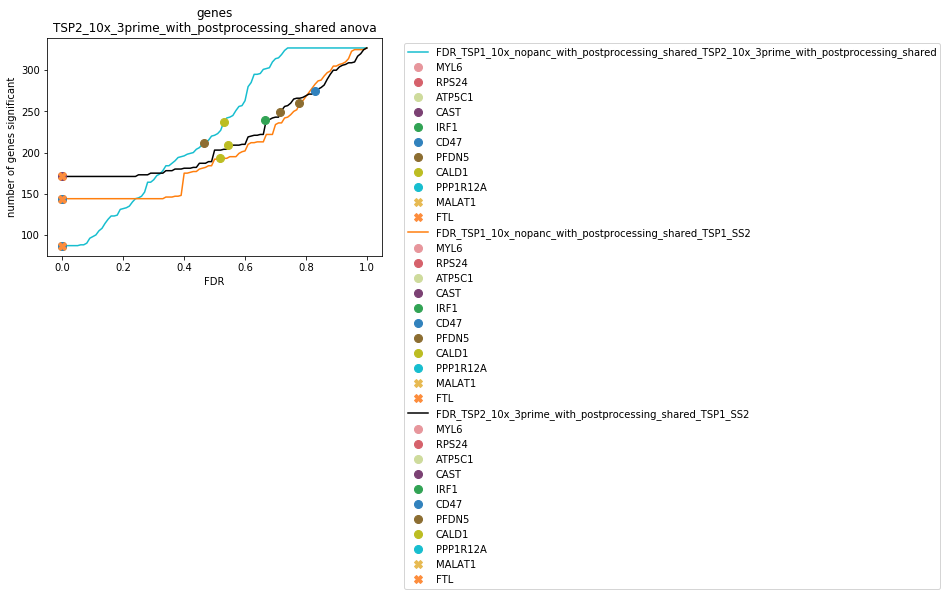

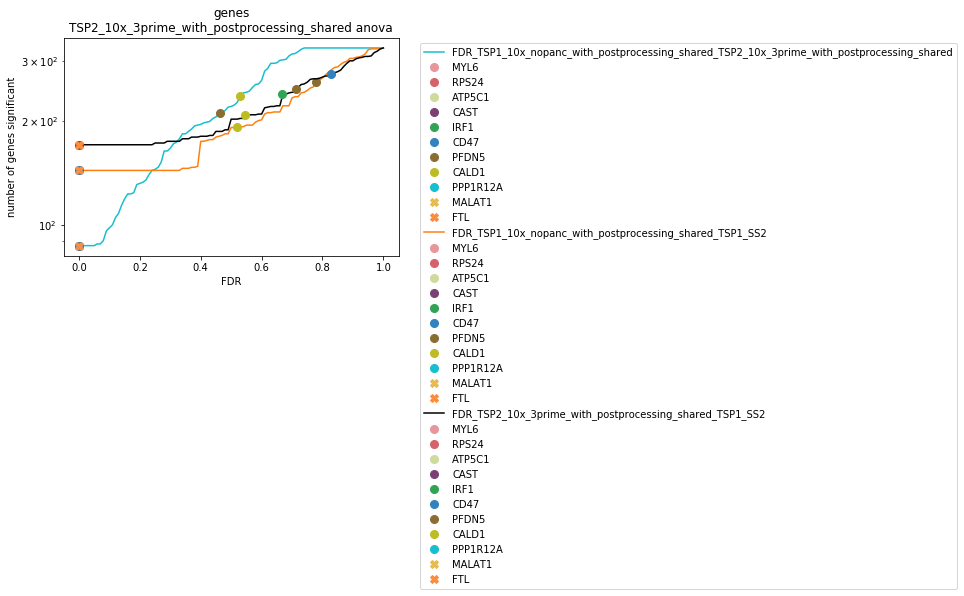

In [8]:
# genes = {"MYL6" : '#e7969c', "RPS24" : '#d6616b', "ATP5C1" : '#cedb9c',"CAST" : '#7b4173', "IRF1" : '#31a354', 
#         "CD47" : '#3182bd', "PFDN5" : '#8c6d31',"MALAT1" : '#e7ba52', "FTL" : '#fd8d3c'}

for val in ["","_log"]:
  count = 0
  for FDR_col in [c for c in df2.columns if c.startswith("FDR_")]:
    x_vals = [x*0.01 for x in range(101)]
    y_vals = []
    for x in x_vals:
      y_vals.append(df2[df2[FDR_col] <= x]["gene"].nunique())

    plt.plot(x_vals,y_vals,label=FDR_col,color=colors[count])
    count += 1
    for gene, color in genes.items():
      x_val = df2[df2["gene"] == gene][FDR_col].min()
      y_val = df2[df2[FDR_col] <= x_val]["gene"].nunique()
      plt.plot([x_val],y_val,marker=marker_dict[gene],linestyle="",label=gene,color=color,markersize=8)
  plt.legend(bbox_to_anchor=(1.05,1))
  plt.xlabel("FDR")
  plt.ylabel("number of genes significant")
  plt.title("genes\n{} anova".format(dataname))
  if val == "_log":
    plt.yscale("log")
  plt.savefig("{}{}_gene_anova{}.png".format(outpath,dataname,val),bbox_inches="tight")

  plt.show()

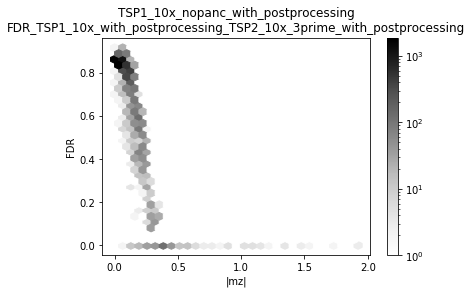

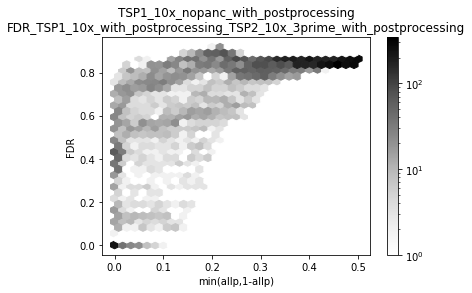

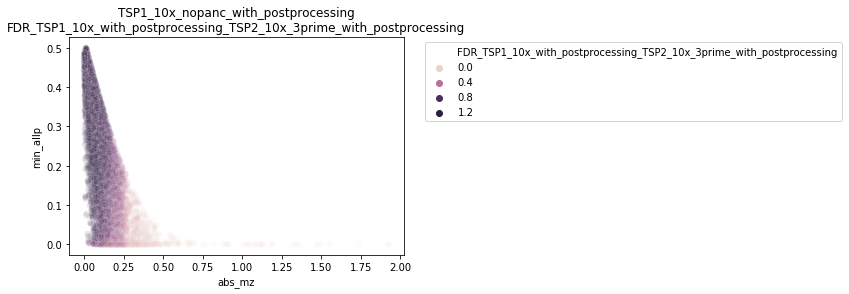

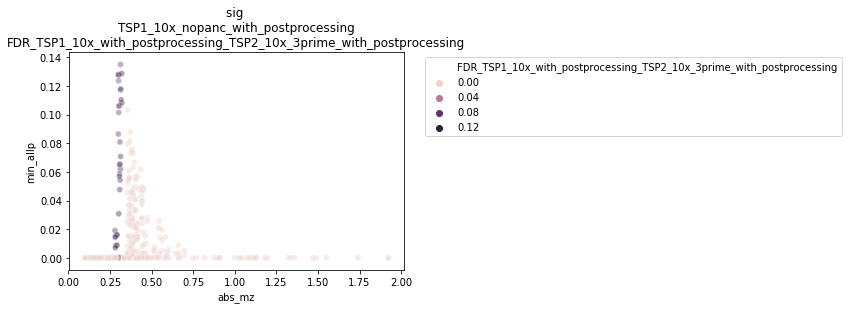

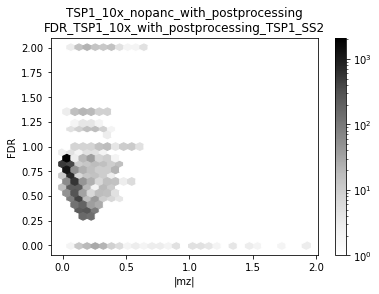

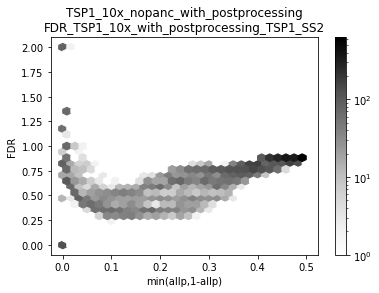

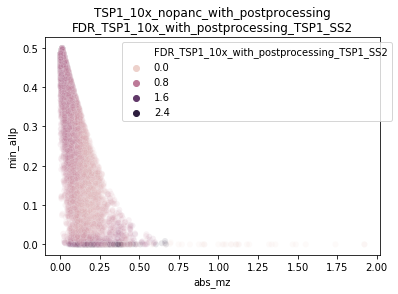

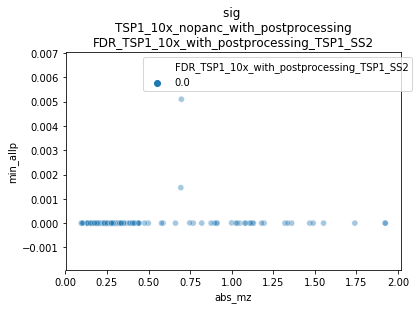

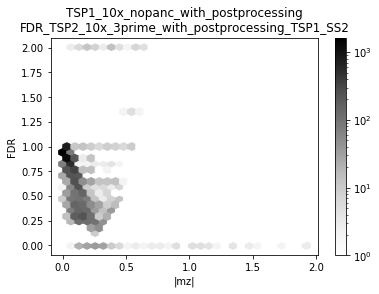

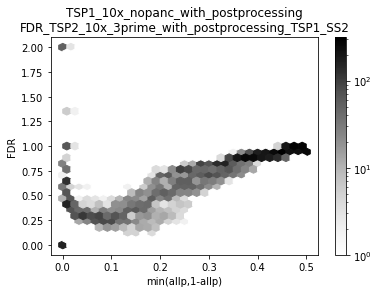

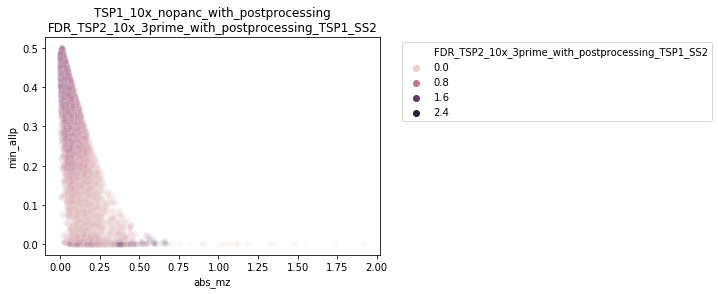

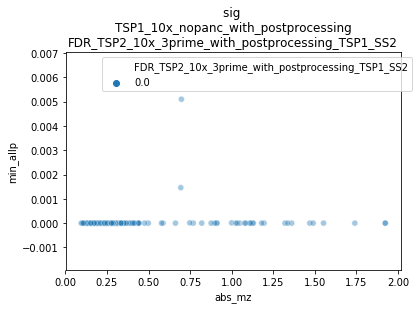

In [76]:
df["rev"] = 1-df["allp"]
df["min_allp"] = df[["rev","allp"]].min(axis=1)
df["abs_mz"] = abs(df["mz"])
for FDR_col in [c for c in df.columns if c.startswith("FDR_")]:
#   plt.plot(df["mz"],df[FDR_col],linestyle="",marker="o",alpha = 0.4)
  plt.hexbin(abs(df["mz"]),df[FDR_col],gridsize=30,cmap="Greys",bins="log")
  plt.colorbar()
  plt.xlabel("|mz|")
  plt.ylabel("FDR")
  plt.title("{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_es_mz.png".format(outpath,dataname,FDR_col),bbox_inches="tight")
  plt.show()
  
  plt.hexbin(df["min_allp"],df[FDR_col],gridsize=30,cmap="Greys",bins="log")
  plt.colorbar()
  plt.xlabel("min(allp,1-allp)")
  plt.ylabel("FDR")
  plt.title("{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_q_mz.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

  plt.show()
  
#   plt.hexbin(df["min_allp"],abs(df["mz"]),gridsize=30,cmap="Greys",bins="log")
#   plt.xlabel("min(allp,1-allp)")
#   plt.ylabel("|mz|")
#   plt.show()

#   plt.plot(df["min_allp"],abs(df["mz"]),linestyle="",marker="o",alpha=0.2)
#   plt.xlabel("min(allp,1-allp)")
#   plt.ylabel("|mz|")
#   plt.show()
  
  sns.scatterplot("abs_mz","min_allp",hue=FDR_col,data=df,alpha = 0.1)
  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.title("{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_es_q_mz.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

  plt.show()
  
  temp = df[df[FDR_col] < 0.1]
  sns.scatterplot("abs_mz","min_allp",hue=FDR_col,data=temp,alpha = 0.4)
  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.title("sig \n{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_es_q_mz_sig.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

  plt.show()

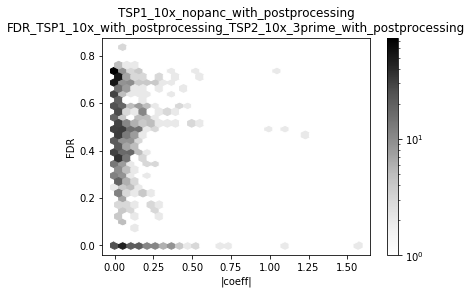

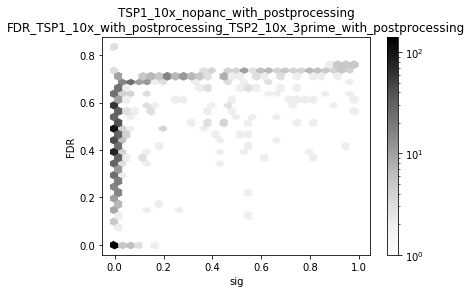

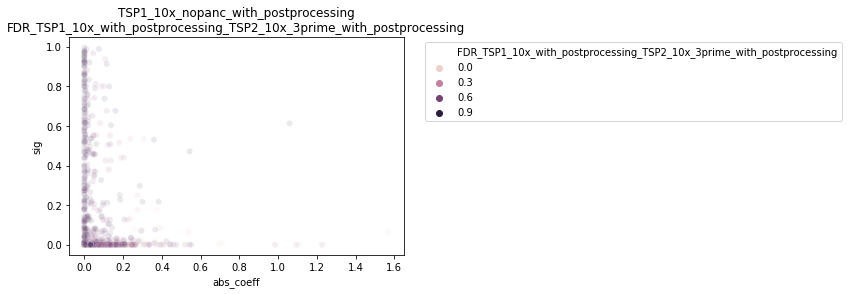

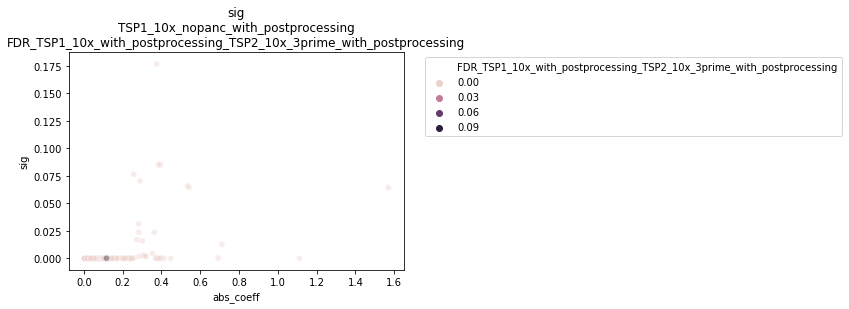

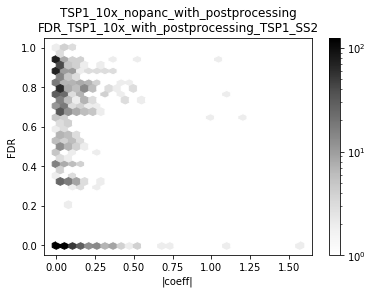

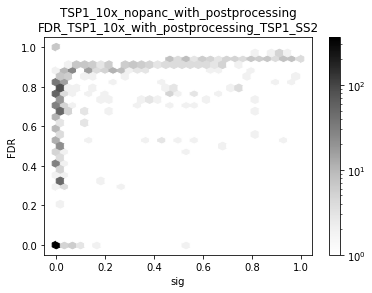

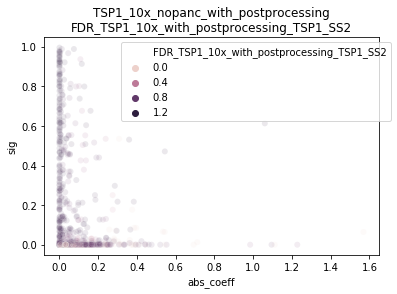

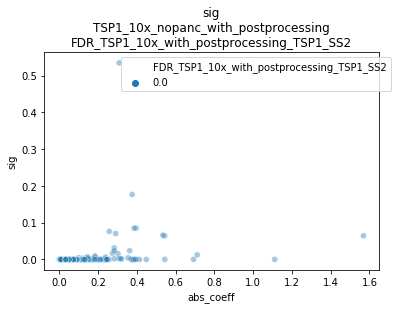

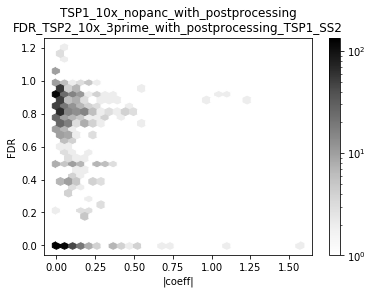

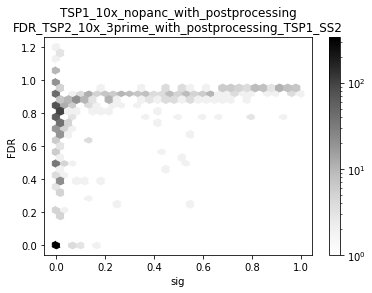

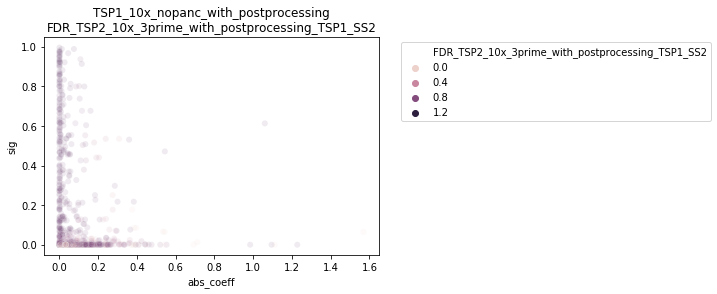

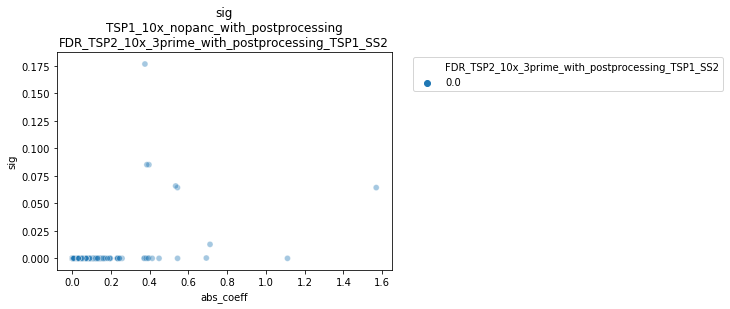

In [77]:
# df2["rev"] = 1-df2["allp"]
# df2["min_allp"] = df2[["rev","allp"]].min(axis=1)
df2["abs_coeff"] = abs(df2["coeff"])
for FDR_col in [c for c in df2.columns if c.startswith("FDR_")]:
  
#   plt.plot(df2["mz"],df2[FDR_col],linestyle="",marker="o",alpha = 0.4)
  plt.hexbin(abs(df2["abs_coeff"]),df2[FDR_col],gridsize=30,cmap="Greys",bins="log")
  plt.colorbar()
  plt.xlabel("|coeff|")
  plt.ylabel("FDR")
  plt.title("{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_es_anova.png".format(outpath,dataname,FDR_col),bbox_inches="tight")
  plt.show()
  
  plt.hexbin(df2["sig"],df2[FDR_col],gridsize=30,cmap="Greys",bins="log")
  plt.colorbar()
  plt.xlabel("sig")
  plt.ylabel("FDR")
  plt.title("{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_q_anova.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

  plt.show()
  
#   plt.hexbin(df2["min_allp"],abs(df2["mz"]),gridsize=30,cmap="Greys",bins="log")
#   plt.xlabel("min(allp,1-allp)")
#   plt.ylabel("|mz|")
#   plt.show()

#   plt.plot(df2["min_allp"],abs(df2["mz"]),linestyle="",marker="o",alpha=0.2)
#   plt.xlabel("min(allp,1-allp)")
#   plt.ylabel("|mz|")
#   plt.show()
  
  sns.scatterplot("abs_coeff","sig",hue=FDR_col,data=df2,alpha = 0.1)
  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.title("{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_es_q_anova.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

  plt.show()
  
  temp = df2[df2[FDR_col] < 0.1]
  sns.scatterplot("abs_coeff","sig",hue=FDR_col,data=temp,alpha = 0.4)
  plt.legend(bbox_to_anchor=(1.05, 1))
  plt.title("sig\n{}\n{}".format(dataname,FDR_col))
  plt.savefig("{}{}_{}_es_q_anova_sig.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

  plt.show()

/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/users/jolivier/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

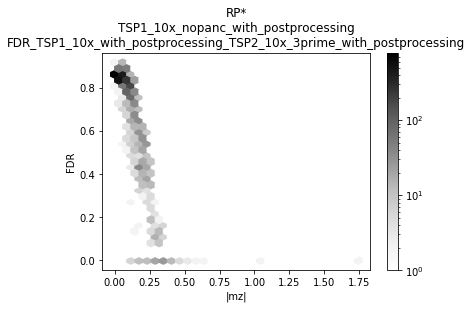

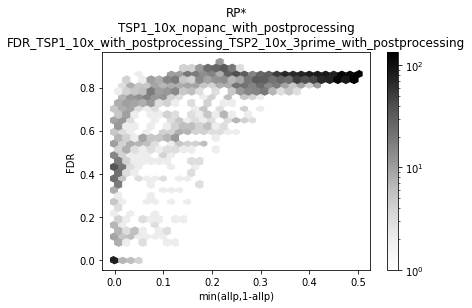

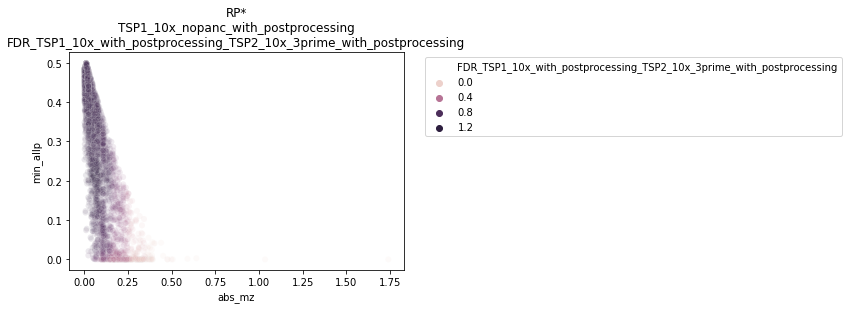

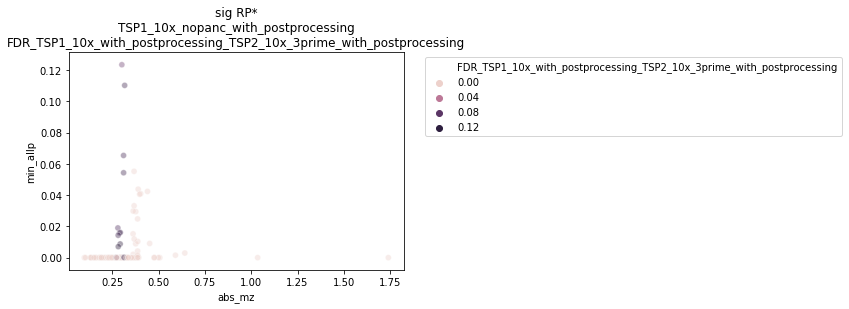

In [78]:
RP_df = df[df["geneR1A_uniq"].str.startswith("RP")]
RP_df["rev"] = 1-RP_df["allp"]
RP_df["min_allp"] = RP_df[["rev","allp"]].min(axis=1)
RP_df["abs_mz"] = abs(RP_df["mz"])
# for FDR_col in [c for c in RP_df.columns if c.startswith("FDR_")]:
FDR_col = "FDR_TSP1_10x_with_postprocessing_TSP2_10x_3prime_with_postprocessing"
#   plt.plot(RP_df["mz"],RP_df[FDR_col],linestyle="",marker="o",alpha = 0.4)
plt.hexbin(abs(RP_df["mz"]),RP_df[FDR_col],gridsize=30,cmap="Greys",bins="log")
plt.colorbar()
plt.xlabel("|mz|")
plt.ylabel("FDR")
plt.title("RP*\n{}\n{}".format(dataname,FDR_col))
plt.savefig("{}{}_{}_es_RP.png".format(outpath,dataname,FDR_col),bbox_inches="tight")
plt.show()

plt.hexbin(RP_df["min_allp"],RP_df[FDR_col],gridsize=30,cmap="Greys",bins="log")
plt.colorbar()
plt.xlabel("min(allp,1-allp)")
plt.ylabel("FDR")
plt.title("RP*\n{}\n{}".format(dataname,FDR_col))
plt.savefig("{}{}_{}_q_RP.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

plt.show()

#   plt.hexbin(RP_df["min_allp"],abs(RP_df["mz"]),gridsize=30,cmap="Greys",bins="log")
#   plt.xlabel("min(allp,1-allp)")
#   plt.ylabel("|mz|")
#   plt.show()

#   plt.plot(RP_df["min_allp"],abs(RP_df["mz"]),linestyle="",marker="o",alpha=0.2)
#   plt.xlabel("min(allp,1-allp)")
#   plt.ylabel("|mz|")
#   plt.show()

sns.scatterplot("abs_mz","min_allp",hue=FDR_col,data=RP_df,alpha = 0.1)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("RP*\n{}\n{}".format(dataname,FDR_col))
plt.savefig("{}{}_{}_es_q_RP.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

plt.show()

temp = RP_df[RP_df[FDR_col] < 0.1]
sns.scatterplot("abs_mz","min_allp",hue=FDR_col,data=temp,alpha = 0.4)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title("sig RP*\n{}\n{}".format(dataname,FDR_col))
plt.savefig("{}{}_{}_es_q_RP_sig.png".format(outpath,dataname,FDR_col),bbox_inches="tight")

plt.show()

,geneR1A_uniq,tissue,compartment,free_annotation,ontology,allp,mz,FDR_TSP1_10x_with_postprocessing_TSP2_10x_3prime_with_postprocessing,FDR_TSP1_10x_with_postprocessing_TSP1_SS2,FDR_TSP2_10x_3prime_with_postprocessing_TSP1_SS2
0,AAMDC,Bladder,Epithelial,bladder urothelial cell,BladderEpithelialbladder urothelial cell,0.190867,-0.109805,0.849515,0.533333,0.558824
1,AAMDC,Bladder,Stromal,fibroblast,BladderStromalfibroblast,0.346662,-0.109805,0.796020,0.590000,0.724409
2,AC019349.5,Bladder,Epithelial,basal cell,BladderEpithelialbasal cell,0.580941,0.017851,0.844796,0.868895,0.935860
3,AC019349.5,Bladder,Epithelial,bladder urothelial cell,BladderEpithelialbladder urothelial cell,0.718627,0.017851,0.854981,0.755287,0.793651
4,AC019349.5,Bladder,Epithelial,intermediate epitheliocyte,BladderEpithelialintermediate epitheliocyte,0.541945,0.017851,0.839045,0.871338,0.963636
...,...,...,...,...,...,...,...,...,...,...
9184,ZFAS1,Muscle,Stromal,multi-potent skeletal muscle stem cell,MuscleStromalmulti-potent skeletal muscle stem...,0.388953,-0.046665,0.849038,0.776758,0.887781
9185,ZFAS1,Muscle,Stromal,smooth muscle cell,MuscleStromalsmooth muscle cell,0.245585,-0.122350,0.792453,0.465517,0.634146
9186,ZFAS1,Muscle,Stromal,tendon cell,MuscleStromaltendon cell,0.383080,-0.057918,0.852364,0.770909,0.886905
9187,ZNF706,Bladder,Epithelial,bladder urothelial cell,BladderEpithelialbladder urothelial cell,0.352663,-0.076056,0.864482,0.712644,0.823529
